<center>
<img src="https://avatars.mds.yandex.net/i?id=08831819d2b500822a90327ea7aee923ef8a5322-9154878-images-thumbs&n=13" height="250">

# Андан на экономе: домашнее задание 3
</center>


> Bicycle bicycle bicycle  <br> I want to ride my bicycle <br> I want to ride my bike <br> I want to ride my bicycle <br>  I want to ride it where I like

$\qquad$ $\qquad$ $\qquad$ $\qquad$  **[Bicycle Race (Queen)](https://www.youtube.com/watch?v=r2lT4oE4DxE)**

**ФИО: Сюй Алиса**




## Общая информация


__Дата выдачи:__ 29.02.2024

__Мягкий дедлайн:__ 23:59MSK 19.05.2024

__Жесткий дедлайн:__ 23:59MSK 26.05.2024

## Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 100 баллов. За каждый день просрочки после мягкого дедлайна снимается 10 баллов. После жёсткого дедлайна работы не принимаются. Даже при опозданиии на одну секунду. Сдавайте работы заранее.

Мягкий дедлайн можно отодвинуть без потери баллов на 1,2 или 3 дня. Суммарно для откладывания в запасе есть три дня. Можно отодвинуть один дедлайн на три дня, а можно три дедлайна подвинуть на один день. Распоряжаться этими днями студент может как угодно. Жёсткий дедлайн, при этом, не меняется. Если такое произошло, нужно сообщить о сдвиге при сдаче работы.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Любой из студентов может быть вызван на защиту любого домашнего задания. В таком случае итоговая оценка студента определяется в результате защиты.

> За отсутствие названий графиков и подписей к осям могут снижаться баллы. Все картинки должны быть самодостаточны и визуально удобны для восприятия, так чтобы не нужно было смотреть ваш код или знать задание, чтобы понять что на них изображено. Выводы должны быть релевантными. Не забывайте их писать. Если в вопросе требуется ответ словами, а его нет, вы будете терять довольно много баллов.

## Формат сдачи

Сам ноутбук называйте в формате hw-02-USERNAME.ipynb, где USERNAME — ваши фамилия и имя на латинице. Задание сдаётся в anytask.

In [170]:
import numpy as np
import pandas as pd

import scipy.stats as sts
import matplotlib.pyplot as plt
import seaborn as sns

<img src = 'https://sun9-44.userapi.com/impg/YVRN2p4UUi9J2ApYOw5IKjdN2OY1eXt2gDhf0A/3XCgdqh_Zmc.jpg?size=1050x802&quality=95&sign=c6fa90b09bb30301ce07ca0d30347e1d&type=album' width = 600>

# Спрос на велосипеды

В этой домашке мы будем работать с данными о спросе на велосипеды. Мы научимся его предсказывать.

In [171]:
df = pd.read_csv('https://raw.githubusercontent.com/hse-econ-data-science/andan2024/main/hw/data/bikes_rent.csv')
print(df.shape)
df.head( )

(731, 13)


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,4.805490,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,7.443949,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,7.437060,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,4.800998,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,5.597810,1600


__Описание переменных:__

* `season`  1 - весна, 2 - лето, 3 - осень, 4 - зима
* `yr`  0 - 2011, 1 - 2012
* `mnth`  от 1 до 12
* `holiday`  0 - нет праздника, 1 - есть праздник
* `weekday`  от 0 до 6
* `workingday`  0 - нерабочий день, 1 - рабочий день
* `weathersit`  оценка благоприятности погоды от 1 (чистый, ясный день) до 4 (ливень, туман)
* `temp`  температура в Цельсиях
* `atemp`  температура по ощущениям в Цельсиях
* `hum`  влажность
* `windspeed(mph)`  скорость ветра в милях в час
* `windspeed(ms)`  скорость ветра в метрах в секунду
* `cnt`  количество арендованных велосипедов (это целевой признак, его мы будем предсказывать)

In [172]:
# Функция для того, чтобы на одной картинке смотреть те графики с прогнозами.
def plot_yreal_ypred(y_test, y_train, y_test_hat, y_train_hat):
    """
        Рисует картинку для прогнозов регрессии
    """

    margin = 0.1 # отступ на границах
    plt.figure(figsize=(10,5))
    plt.subplot(121)
    plt.scatter(y_train, y_train_hat, color="red", alpha=0.9)
    plt.xlabel('Истинные значения')
    plt.ylabel('Предсказанные значения')
    plt.axis('equal')
    plt.axis('square')
    train_min = min(y_train)
    train_max = max(y_train)
    plt.xlim(train_min - margin, train_max + margin)
    plt.ylim(train_min - margin, train_max + margin)
    plt.plot([-10000, 10000], [-10000, 10000])
    plt.title('Train set', fontsize=20)

    plt.subplot(122)
    plt.scatter(y_test, y_test_hat, color="red", alpha=0.9)
    plt.xlabel('Истинные значения')
    plt.ylabel('Предсказанные значения')
    plt.axis('equal')
    plt.axis('square')
    test_min = min(y_test)
    test_max = max(y_test)
    plt.xlim(test_min - margin, test_max + margin)
    plt.ylim(test_min - margin, test_max + margin)
    plt.plot([-10000, 10000], [-10000, 10000])
    plt.title('Test set', fontsize=20)
    pass

## 1. EDA

__а) [5 баллов]__ Проверьте, есть ли в данных пропуски

In [173]:
df.shape

(731, 13)

In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          731 non-null    int64  
 1   yr              731 non-null    int64  
 2   mnth            731 non-null    int64  
 3   holiday         731 non-null    int64  
 4   weekday         731 non-null    int64  
 5   workingday      731 non-null    int64  
 6   weathersit      731 non-null    int64  
 7   temp            731 non-null    float64
 8   atemp           731 non-null    float64
 9   hum             731 non-null    float64
 10  windspeed(mph)  731 non-null    float64
 11  windspeed(ms)   731 non-null    float64
 12  cnt             731 non-null    int64  
dtypes: float64(5), int64(8)
memory usage: 74.4 KB



В данных нет пропусков

---







__б) [5 баллов]__ Составьте список из категориальных переменных и список из действительных переменных.

Разбиваю по типам данных, признаки целочисленные пойдут как категориальные, иначе (флоат) - непрерывные. По смыслу ок все. Таргет для удобства разбиения превращаю в флоат (чтобы в категориальные не затесался) и отношу в табличку с действительными переменными

---

In [175]:
df['cnt'] = df['cnt'].astype('float64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          731 non-null    int64  
 1   yr              731 non-null    int64  
 2   mnth            731 non-null    int64  
 3   holiday         731 non-null    int64  
 4   weekday         731 non-null    int64  
 5   workingday      731 non-null    int64  
 6   weathersit      731 non-null    int64  
 7   temp            731 non-null    float64
 8   atemp           731 non-null    float64
 9   hum             731 non-null    float64
 10  windspeed(mph)  731 non-null    float64
 11  windspeed(ms)   731 non-null    float64
 12  cnt             731 non-null    float64
dtypes: float64(6), int64(7)
memory usage: 74.4 KB


In [176]:
var_cat = df.select_dtypes(include = ['int64'])
var_real = df.select_dtypes(include = ['float64'])

__в) [5 баллов]__ Нарисуйте гистограмму для целевого признака. Что можете сказать о его хвосте? Надо ли предпринять какие-нибудь манипуляции, связанные с борьбой с выбросами?

In [177]:
df.season.value_counts(normalize=True) # данные по сезонам ок распределены, дизбаланса нет

season
3    0.257182
2    0.251710
1    0.247606
4    0.243502
Name: proportion, dtype: float64

In [178]:
df.groupby(by = 'season').cnt.mean()

# season 1 - весна, 2 - лето, 3 - осень, 4 - зима

season
1    2604.132597
2    4992.331522
3    5644.303191
4    4728.162921
Name: cnt, dtype: float64

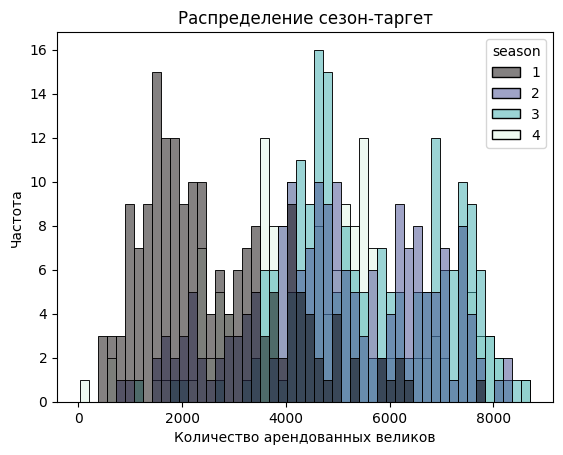

In [179]:
sns.histplot(data = df, x = 'cnt', hue = 'season', bins = 50, palette = 'mako');
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.title('Распределение сезон-таргет')
plt.ylabel('Частота')
plt.xlabel('Количество арендованных великов')
plt.grid()


Велики местные жители не любят брать весной, зато в остальные периоды года с радостью катаются. Левая часть распредления формируется в основном весенней арендой байков, правая - в остальные времена года. Видимо их весна это не сезон.

---



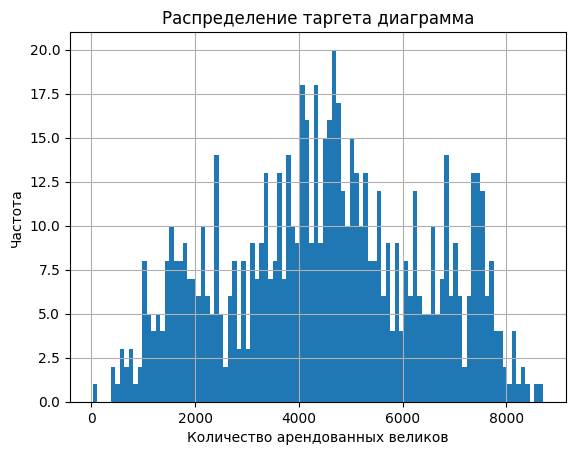

In [180]:
plt.hist(df.cnt, bins = 100);
plt.title('Распределение таргета диаграмма')
plt.ylabel('Частота')
plt.xlabel('Количество арендованных великов')
plt.grid()

__Ответ:__  Распределение таргета за год очень отдаленно может напоминать нормальное, в целом выбросов в данных нет, это по боксплоту видно.



---


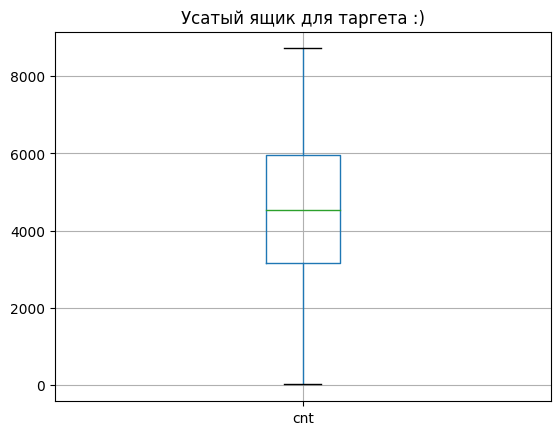

In [181]:
df.boxplot(column=['cnt'])
plt.title('Усатый ящик для таргета :)');

__г) [5 баллов]__ Давайте посмотрим на то, как переменные коррелируют с таргетом. Для этого постройте соответствующую облака рассеивания.

In [182]:
var_real.corrwith(df.cnt) # только для непрерывных признаков

temp              0.627494
atemp             0.631066
hum              -0.100659
windspeed(mph)   -0.234545
windspeed(ms)    -0.234545
cnt               1.000000
dtype: float64

С категориальными признаками требуется делать предварительную обработку, я с ними корреляцию считать не буду.


---



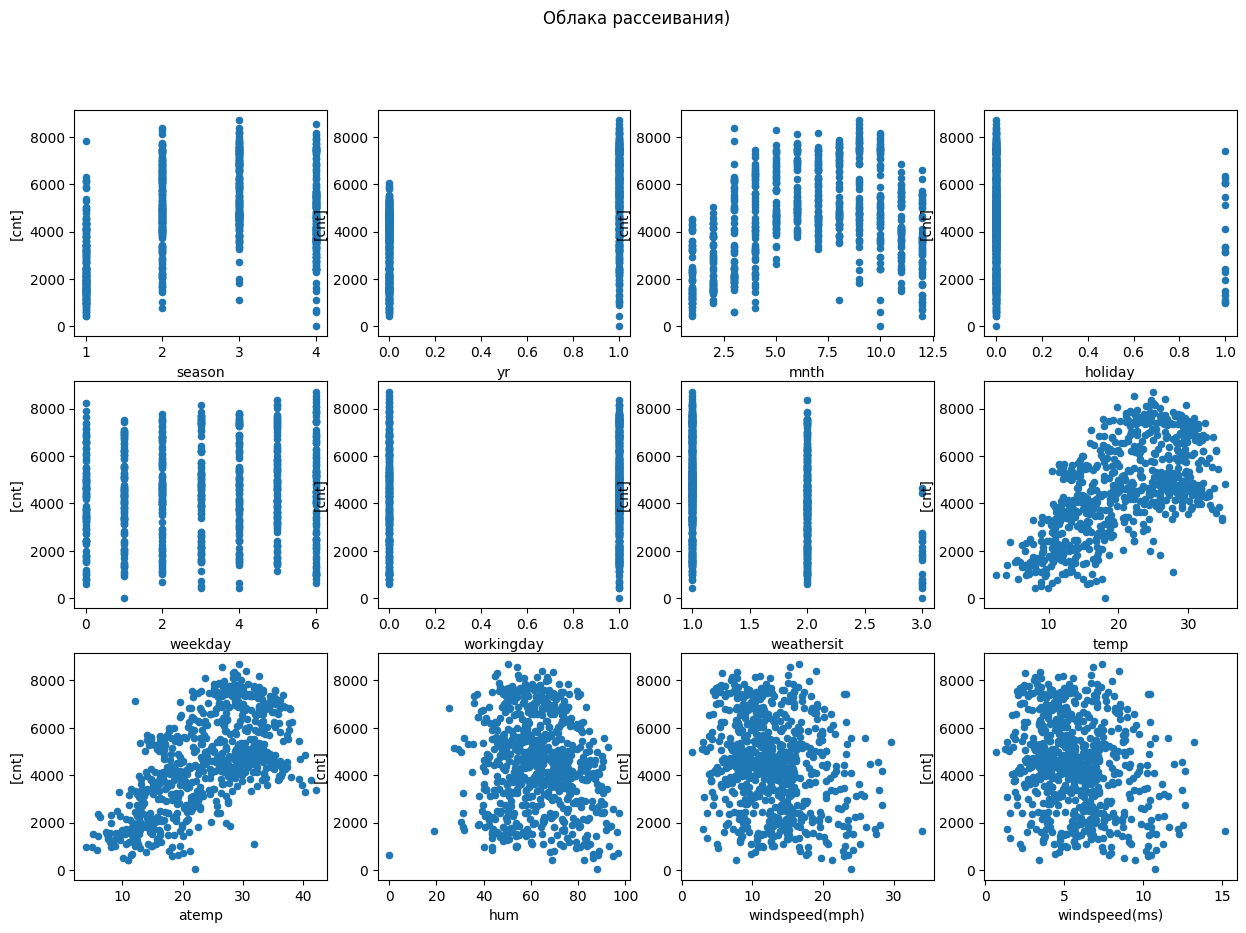

In [183]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))
plt.suptitle('Облака рассеивания)');

for idx, feature in enumerate(df.columns[:-1]):
    df.plot(feature, ['cnt'], subplots=True, kind="scatter", ax=axes[idx // 4, idx % 4])

__д) [5 баллов]__ Каков характер зависимости числа прокатов от месяца? От каких признаков спрос зависит линейно?

__Ответ:__  1) Под конец года чаще берут велосипеды, чем в начале года. Мини расследование было выше. Весной не пользуются спросом

2) Таргет линейно зависит от признаков: temp и atemp - положительно. С hum, windspeed(mph) и windspeed(ms) у целевой переменной корреляция отрицательна


---



__е) [5 баллов]__ Постройте гистограммы для всех непрерывных переменных. Что можете сказать о выбросах?

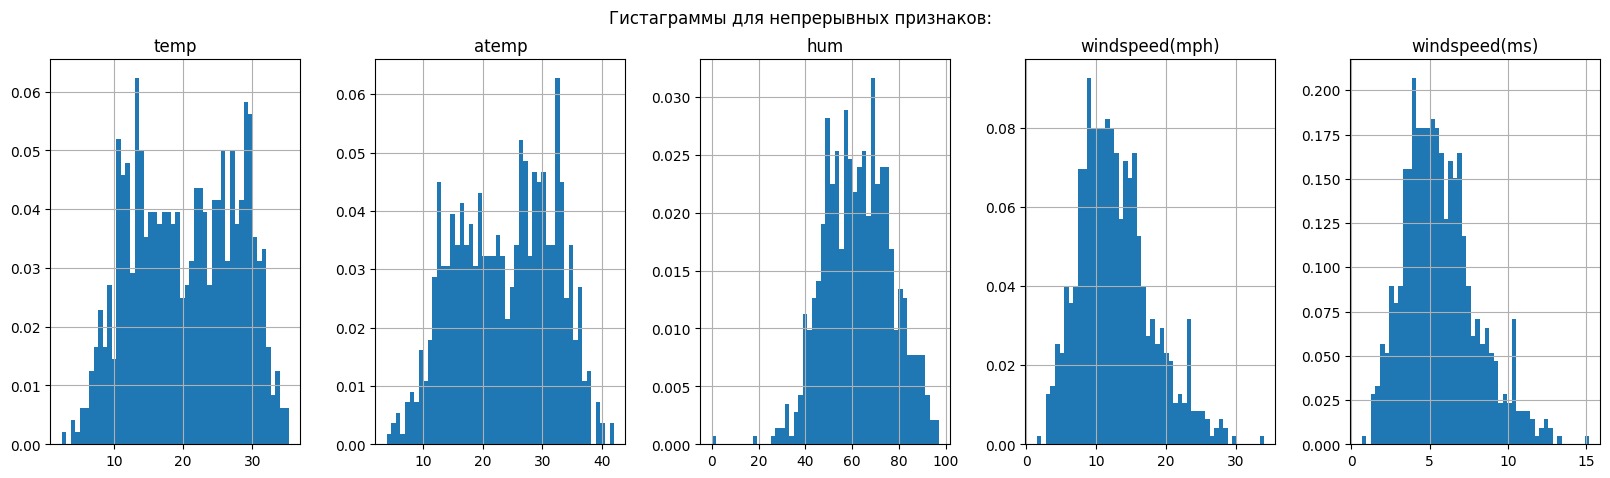

In [184]:
var_real.drop(['cnt'], axis = 1).hist(figsize=(20, 5),bins=50,  layout =(1,-1), density = True);
plt.suptitle('Гистаграммы для непрерывных признаков:');

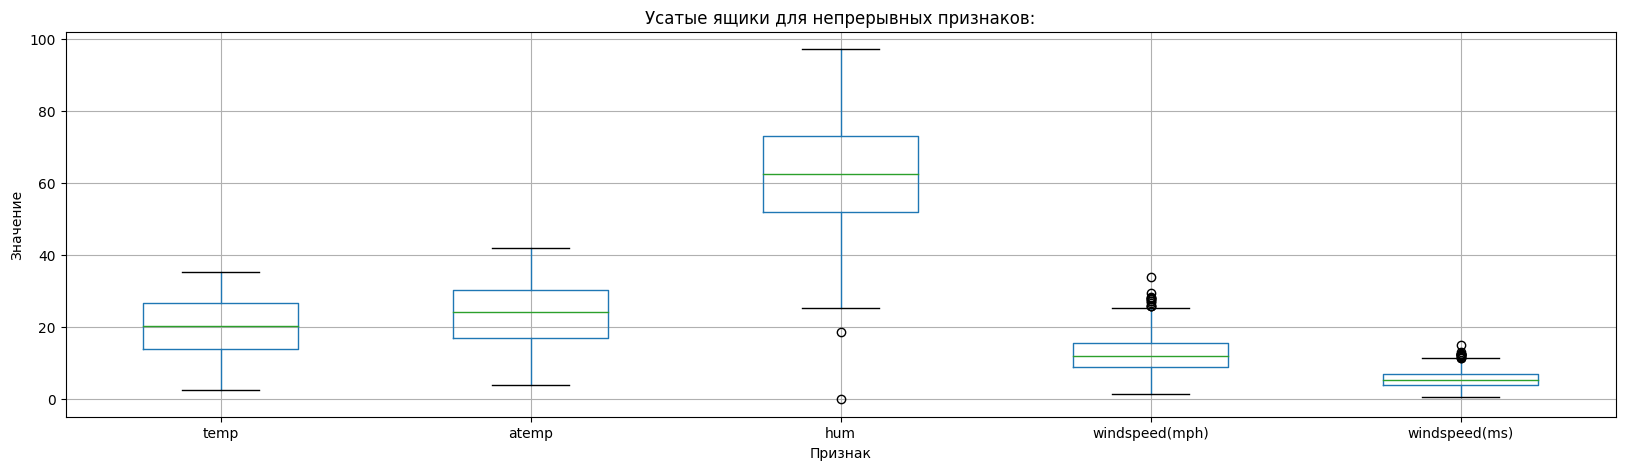

In [185]:
var_real.drop(['cnt'], axis = 1).boxplot(figsize=(20, 5), ylabel = 'Значение', xlabel = 'Признак');
plt.title('Усатые ящики для непрерывных признаков:');

Есть выбросы в windspeed(mph) и windspeed(ms), видимо в некоторые дни в городе буйствовал смерч. У признака hum выбросы в сторону нуля, возможно было наводнение.

---



__ж) [5 баллов]__ Постройте между непрерывными признаками корреляционную матрицу. Нарисуйте её. Какие признаки, скорее всего, неинформативны? Почему они на ваш взгляд такие?

In [186]:
var_real.corr()

,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
temp,1.000000,0.991702,0.126963,-0.157944,-0.157944,0.627494
atemp,0.991702,1.000000,0.139988,-0.183643,-0.183643,0.631066
hum,0.126963,0.139988,1.000000,-0.248489,-0.248489,-0.100659
windspeed(mph),-0.157944,-0.183643,-0.248489,1.000000,1.000000,-0.234545
windspeed(ms),-0.157944,-0.183643,-0.248489,1.000000,1.000000,-0.234545
cnt,0.627494,0.631066,-0.100659,-0.234545,-0.234545,1.000000


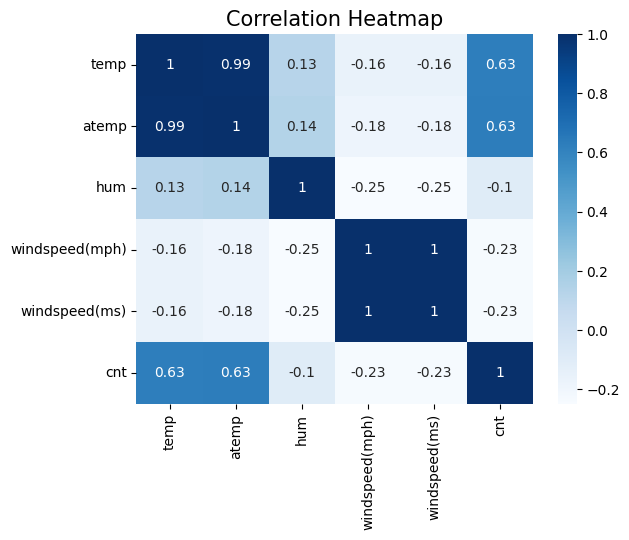

In [187]:
corr_var_real = sns.heatmap(var_real.corr(), cmap='Blues', annot=True, fmt='0.2g');
corr_var_real.set_title('Correlation Heatmap', fontsize = 15);

__Ответ:__ ...

* Признаки temp (температура в Цельсиях) и atemp (температура по ощущуениям) корреляция между ними 0.99 округленно. От них положительно линейно зависит таргет - здесь уже индикатор возможной проблемы мультиколлениарности. Линрег встроенный ищет оптимальные веса с точки зрения мсе аналитически - по специальной формуле с перемножением и обращением матриц, если есть лин зависимые признаки, то рискуем получить один из матричных множителей в вырожденном виде, что не позволит алгоритму найти от нее обратную матрицу. Или же просто усложнит работу если лин зависимых признаков немного, в результате можем корявые/неставильные/неадекватные веса у модели получить.

$$w = (X^TX)^{-1} X^T y$$
так веса находим алгоритм классический (без гд).


* windspeed(mph)-скорость ветра в милях в час и windspeed(ms)-скорость в метрах коррелированы идентично, это одинаковые данные, просто выраженные в разных единицах измерения, одно выражается через другое. По хорошему от лишних признаков надо избавиться, модели трудно работать с их большим количеством

В случаях выше один из признаков можно удалить за неинформативность, но тк дальше регуляризацию будем делать и в условии ничего не сказано про расправу с признаками, здесь я ничего трогать не буду


---



__з) [5 баллов]__ Постройте для всех категориальных переменных _countplot_. Что интересного вы видите в распределеии этих признаков?  Встречаются ли слишком обширные категории, в которых очень маленькие части нам придётся объединять в категорию "другое"?

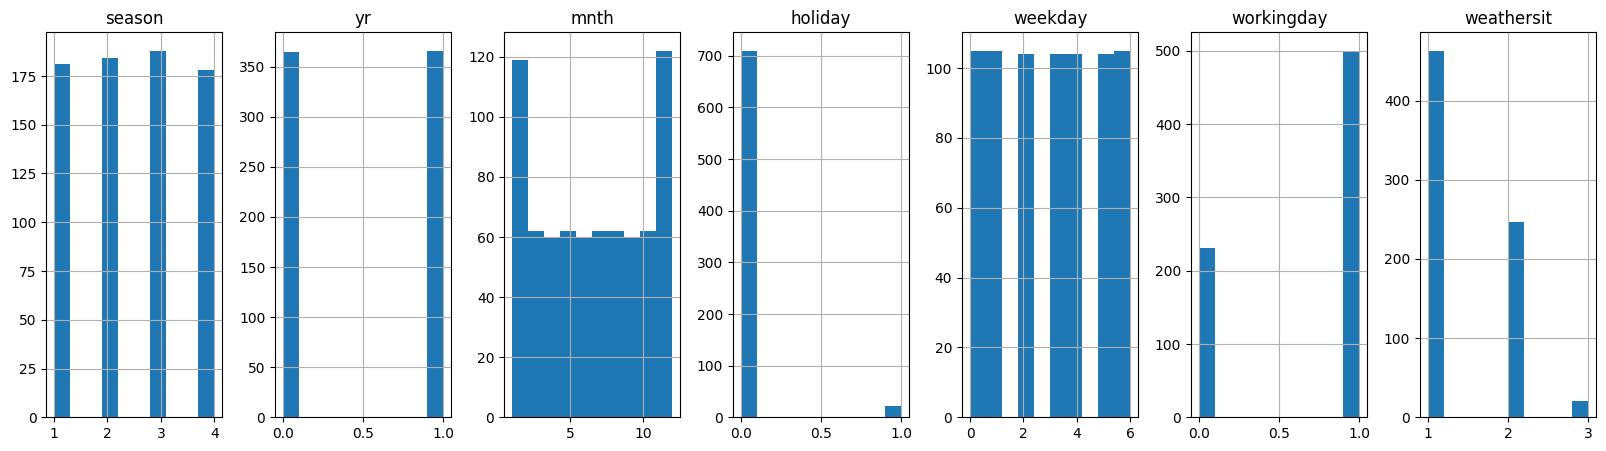

In [188]:
var_cat.hist(figsize = (20,5), layout = (1, -1));

На крайнем правом графике weathersit: класс 3 объединю с классом 2, они ближе по логике, чем 3 и 1.

*weathersit оценка благоприятности погоды от 1 (чистый, ясный день) до 4 (ливень, туман)*


Категории другие не сильно обширные, больше объединять нечего: столбцов мало или и так все хорошо сбалансировано.


---



In [189]:
df.weathersit -=(df.weathersit==3)
df.weathersit.value_counts()

weathersit
1    463
2    268
Name: count, dtype: int64

__Ответ:__  да, в weathersit теперь только 2 варианта значений

__и) [5 баллов]__  Сделайте OHE-кодирование. Сколько свежих OHE-признаков у нас появилось?

In [190]:
var_cat.shape # так было в var_cat таблице

(731, 7)

In [191]:
var_cat_encoded = pd.get_dummies(var_cat, columns=var_cat.columns, drop_first=True) # обучаем линрег, поэтому drop_first
var_cat_encoded.head()

,season_2,season_3,season_4,yr_1,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,...,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weathersit_2,weathersit_3
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,False


Закодировали => сплит на трейн и тест. Если бы делали в обратной последовательности, то только ohe от sklearn.

In [192]:
var_cat_encoded.shape # так стало, дальше будем джойнить с таблицей вещественных признаков var_real

(731, 25)

In [193]:
25-7 # столько прибавилось признаков

18

__к) [5 баллов]__   Некоторые из наших переменных могут вносить в спрос на велики квадратичный вклад. Например, температура.

Сначала, когда температура возрастает, люди выходят кататься охотнее, а потом, когда становится жарко, спрос резко падает. Так возникает параболическая зависимость.

Создайте для каждой действительной переменной из данных дополнительную переменную: её квадрат.

In [194]:
for i in var_real.iloc[:,:-1].columns:
  var_real[f'{i}^2'] = var_real[i]**2

In [195]:
var_real.head()

,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt,temp^2,atemp^2,hum^2,windspeed(mph)^2,windspeed(ms)^2
0,14.110847,18.18125,80.5833,10.749882,4.805490,985.0,199.116003,330.557852,6493.668239,115.559963,23.092738
1,14.902598,17.68695,69.6087,16.652113,7.443949,801.0,222.087427,312.828200,4845.371116,277.292867,55.412371
2,8.050924,9.47025,43.7273,16.636703,7.437060,1349.0,64.817377,89.685635,1912.076765,276.779887,55.309860
3,8.200000,10.60610,59.0435,10.739832,4.800998,1562.0,67.240000,112.489357,3486.134892,115.343991,23.049580
4,9.305237,11.46350,43.6957,12.522300,5.597810,1600.0,86.587436,131.411832,1909.314198,156.807997,31.335472


__л) [5 баллов]__  Попробуйте придумать ещё какую-нибудь новую фичу (дополнительную переменную) для прогнозирования. Опишите какая за вашей фичёй стоит интуиция и почему это должно сработать при моделировании.

In [196]:
var_real['+1'] = np.log(1/(1 + var_real['hum']) + var_real['atemp'])**2

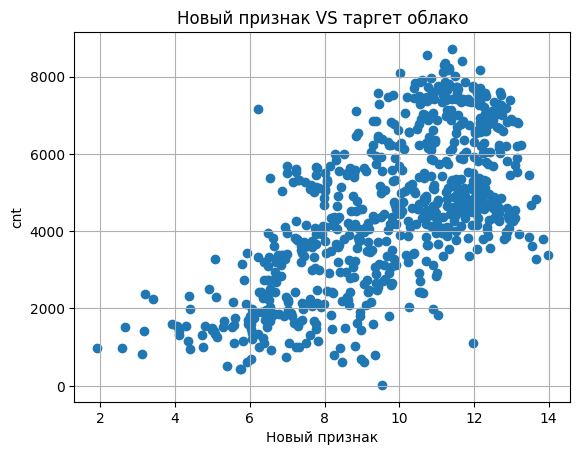

In [197]:
plt.scatter(var_real['+1'] , var_real['cnt']);
plt.title('Новый признак VS таргет облако')
plt.xlabel("Новый признак")
plt.ylabel("cnt")
plt.grid()

Что за облако такое? Если честно я просто на рандоме натыкала возможные комбинации из вещественных признаков, смотрела как обычный линрег будет реагировать на новичка, по итогу выбрала этот (рмсе, р2 были ок), там несколько нелинейных преобразований: логарифм и возведение в квадрат. Связь с таргетом не очень понятна, что-то между линейной и квадратичной. Если работает, то лучше не трогать, с ним метрики на линреге хорошие получились.


---



In [198]:
df = var_real.join(var_cat_encoded) # объединяем закодированные колонки и вещественные
df.head()

,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt,temp^2,atemp^2,hum^2,windspeed(mph)^2,...,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weathersit_2,weathersit_3
0,14.110847,18.18125,80.5833,10.749882,4.805490,985.0,199.116003,330.557852,6493.668239,115.559963,...,False,False,False,False,False,False,True,False,True,False
1,14.902598,17.68695,69.6087,16.652113,7.443949,801.0,222.087427,312.828200,4845.371116,277.292867,...,False,False,False,False,False,False,False,False,True,False
2,8.050924,9.47025,43.7273,16.636703,7.437060,1349.0,64.817377,89.685635,1912.076765,276.779887,...,False,True,False,False,False,False,False,True,False,False
3,8.200000,10.60610,59.0435,10.739832,4.800998,1562.0,67.240000,112.489357,3486.134892,115.343991,...,False,False,True,False,False,False,False,True,False,False
4,9.305237,11.46350,43.6957,12.522300,5.597810,1600.0,86.587436,131.411832,1909.314198,156.807997,...,False,False,False,True,False,False,False,True,False,False


In [199]:
print('Минимальное значение признака "+1": {}'.format(df['+1'].min()))
print('Максимальное значение признака "+1": {}'.format(df['+1'].max()))

# это я проверяю что новый признак не улетает в бесконечность, такое было пару раз, когда я думала какую бы комбинацию налепить

Минимальное значение признака "+1": 1.9064610670224296
Максимальное значение признака "+1": 13.981156511944276


## 2. Обучение модели

__а) [10 баллов]__  Разбейте выборку на тренировочную и тестовую.

In [200]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin

In [201]:
y = df.copy().cnt
X = df.copy().drop(['cnt'], axis = 1)

In [202]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 52)

In [203]:
scaller = MinMaxScaler()
scaller.fit(X_train)
X_train = pd.DataFrame(data=scaller.transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(data=scaller.transform(X_test), columns=X_test.columns)
X_train.head()

,temp,atemp,hum,windspeed(mph),windspeed(ms),temp^2,atemp^2,hum^2,windspeed(mph)^2,windspeed(ms)^2,...,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weathersit_2,weathersit_3
0,0.428893,0.409145,0.241104,0.554829,0.554829,0.215408,0.208955,0.117392,0.345848,0.345848,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.838014,0.772963,0.379713,0.082866,0.082866,0.719701,0.627638,0.220465,0.018563,0.018563,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,0.504695,0.495335,0.410515,0.266038,0.266038,0.286823,0.288327,0.246899,0.100827,0.100827,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.857742,0.801961,0.497610,0.303481,0.303481,0.751393,0.670443,0.328583,0.124632,0.124632,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.802708,0.755577,0.691450,0.185805,0.185805,0.664680,0.602642,0.547202,0.057805,0.057805,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


__б) [10 баллов]__ Возьмите RMSE в качестве метрики качества. Для этого нужно написать свою функцию. Постройте наивный прогноз (среднее) и найдите для него RMSE.

In [204]:
from sklearn.metrics import mean_squared_error, r2_score

In [205]:
def rmse(y_true, y_pred):
  return np.sqrt(mean_squared_error(y_true, y_pred))

In [206]:
rmse_pred_test, rmse_pred_train = np.full_like(y_test, y_train.mean()), np.full_like(y_train, y_train.mean())

rmse_train = rmse(y_train, rmse_pred_train)
rmse_test = rmse(y_test, rmse_pred_test)

print('Naive func')
print('RMSE на трейне: {}'.format(rmse_train))
print('RMSE на тесте: {}'.format(rmse_test))

Naive func
RMSE на трейне: 1943.9730246189315
RMSE на тесте: 1917.6856402251128


__в) [5 баллов]__ Запустите код с разбиением выборки на тренировочную и тестовую, подсчётом наивного прогноза и RMSE по нему несколько раз. НЕ НАДО НИЧЕГО КОПИРОВАТЬ. ПРОСТО ПЕРЕЗАПУСТИТЕ КОД ТРИ РАЗА. Меняется ли RMSE? Почему оно меняется? К чему плохому это может привести при обучении? Как это обычно исправляют?

__Ответ:__  ... ну в целом будет меняться если рэндом стейт не фиксировать, значение метрик еще зависит от трейн тест разбиения, если как-то пытаться оптимизировать модель, то при нефиксированном сплите не сможем определить стало лучше или все опять сломалось.

---



__г) [10 баллов]__ Оцените линейную регрессию. Насколько удалось улучшить качество прогнозирования в сравнении с наивным прогнозом?  Визуализируйте прогнозы функцией `plot_yreal_ypred`.

Что вы видите на этой визуализации? Проинтерпретируйте картинку.



In [207]:
from sklearn.linear_model import LinearRegression

In [208]:
model = LinearRegression()
model.fit(X_train, y_train)
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

In [209]:
rmse_train_linear = rmse(y_train, pred_train)
rmse_test_linear = rmse(y_test, pred_test)

print('Linear model')
print('RMSE на трейне: {}'.format(rmse_train_linear))
print('r2 на трейне: {}'.format(r2_score(y_train, pred_train)))
print()
print('RMSE на тесте: {}'.format(rmse_test_linear))
print('r2 на тесте: {}'.format(r2_score(y_test, pred_test)))

Linear model
RMSE на трейне: 635.7215761201255
r2 на трейне: 0.8930567361146918

RMSE на тесте: 717.5584698275532
r2 на тесте: 0.8596418814012934


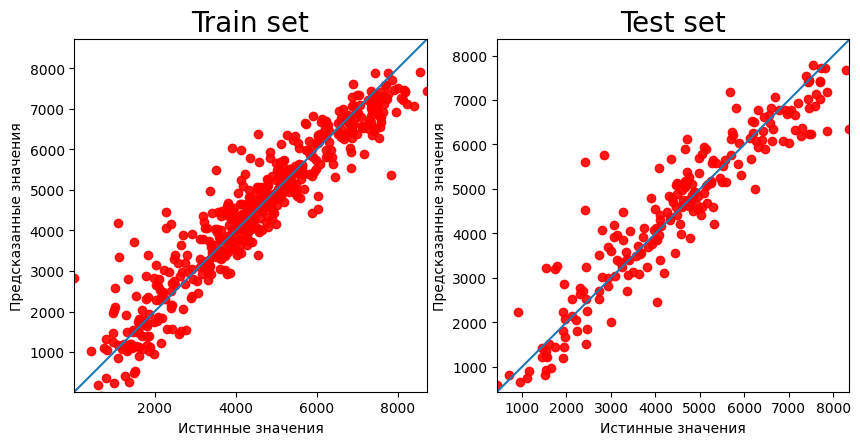

In [210]:
plot_yreal_ypred(y_test, y_train, pred_test, pred_train)

__Ответ:__ Линейная модель кажется немного переобученной, разница между трейном и тестом 82 единицы. На графиках видно, что точки расположились примерно около диагонали, иногда встречаются небольшие выбросы, в целом работает лучше наивного прогноза.

__д) [10 баллов]__ Какими получились значения перед коэффициентами у вашей модели?  Как думаете, почему такое произошло?

__Ответ:__  Веса большие, явное свидетельство переобучения, из анализа метрик выше видно, что разница в рмсе на тесте и на трейне тоже приличная. Надо убрать линейно зависимые признаки или применить регуляризацию для уменьшения значения весов.

In [211]:
for i in range(X_train.shape[1]):
  print(f'{X_train.columns[i]}, вес = {model.coef_[i]}')

temp, вес = 14607.601007482615
atemp, вес = 61875.20459180686
hum, вес = 4628.130285903167
windspeed(mph), вес = 242432161417456.16
windspeed(ms), вес = -242432161418371.2
temp^2, вес = -10894.618101261101
atemp^2, вес = -26123.215268528238
hum^2, вес = -5958.090296492993
windspeed(mph)^2, вес = -106901595022377.5
windspeed(ms)^2, вес = 106901595021735.97
+1, вес = -39452.60289970453
season_2, вес = 572.2261429553103
season_3, вес = 1003.6299685965955
season_4, вес = 1529.1634299190075
yr_1, вес = 1996.335985553793
mnth_2, вес = 140.85387555299468
mnth_3, вес = 324.3168862718264
mnth_4, вес = 178.35948082378962
mnth_5, вес = 650.0752313894667
mnth_6, вес = 655.7636993530518
mnth_7, вес = 537.6481409459384
mnth_8, вес = 285.22360400440374
mnth_9, вес = 591.5217800278156
mnth_10, вес = -93.1207900901007
mnth_11, вес = -294.1948407946113
mnth_12, вес = -97.61783179537935
holiday_1, вес = -67061217547.27718
weekday_1, вес = 67061217397.22214
weekday_2, вес = 67061217519.425316
weekday_3, в

## 3. Бонус

__a) [2 балла]__ Обучите Lasso-регрессию. В качестве силы регуляризации возьмите $\alpha = 40$.

* Каким получилось качество прогноза?
* Что в модели произошло с коэффициентами?  

In [232]:
from sklearn.linear_model import Lasso, Ridge

In [233]:
alpha = 40
model_lasso = Lasso(alpha)
model_lasso.fit(X_train, y_train)
pred_train = model_lasso.predict(X_train)
pred_test = model_lasso.predict(X_test)

In [234]:
print('Lasso model with alpha = {} '.format(alpha))
print('RMSE на трейне: {}'.format(rmse(y_train, pred_train)))
print('r2 на трейне: {}'.format(r2_score(y_train, pred_train)))
print()
print('RMSE на тесте: {}'.format(rmse(y_test, pred_test)))
print('r2 на тесте: {}'.format(r2_score(y_test, pred_test)))

Lasso model with alpha = 40 
RMSE на трейне: 923.6736673125812
r2 на трейне: 0.7742349780951356

RMSE на тесте: 941.5887023276543
r2 на тесте: 0.7583173768630751


In [235]:
model_lasso.coef_

array([3933.58597479,    0.        ,   -0.        ,   -0.        ,
         -0.        ,    0.        ,    0.        ,  -21.84963453,
         -0.        ,   -0.        ,    0.        ,  413.23253839,
        194.48347162,  820.26892397, 1995.17338323,   -0.        ,
         -0.        ,   -0.        ,    0.        ,    0.        ,
         -0.        ,    0.        ,  381.89507529,    0.        ,
         -0.        ,   -0.        ,   -0.        ,   -0.        ,
         -0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,   11.97716613, -460.66389177, -974.54045541])

__Ответ:__   Альфа = 40 работает слишком радикально, больше половины весов обнулилось, возможно некоторые важные признаки были устранены, так как ошибка модели выросла. Rmse увеличилось, р2 уменьшился - стало хуже, чем в классическом лин реге без регуляризации. Ситуация улучшится если взять меньшую альфу.

---



__б) [0 баллов]__  Изучите код в этом пункте и прочитайте выводы. Подумайте об этом.

В случае линейных моделей, обычно, используют два вида регуляризации: Ridge и Lasso. Первая прибавляет к MSE квадраты коэффицентов, а вторая модули. Давайте посмотрим какая между ними разница.

Обучим много-много моделей с разными силами регуляризации $\alpha$ и посмотрим что получится.

In [236]:
alphas = np.arange(1, 100, 2)   # задали диапазон для силы регуляризатора

# матрицы для весов перед коэффициентами (число регрессоров)*(число признаков)
coefs_lasso = np.zeros((alphas.shape[0], X.shape[1]))
coefs_ridge = np.zeros((alphas.shape[0], X.shape[1]))
i = 0
for alph in alphas:
    rg = Ridge(alpha=alph)
    ls = Lasso(alpha=alph, max_iter = 100000)
    rg.fit(X,y)
    ls.fit(X,y)
    coefs_ridge[i] = rg.coef_
    coefs_lasso[i] = ls.coef_
    i += 1

In [237]:
coefs_lasso

array([[  543.10210011,  1396.64726261,    45.44359505, ...,
          349.48195139,  -338.24910057, -1367.7200972 ],
       [  549.6261102 ,  1150.41116356,    46.70607245, ...,
          319.65789619,  -301.51197667, -1236.49335679],
       [  575.02418021,   907.76255465,    49.27447425, ...,
          290.55921105,  -265.94913877, -1096.87823233],
       ...,
       [  522.71112889,     0.        ,    64.13885713, ...,
            0.        ,    -0.        ,    -0.        ],
       [  522.68139079,     0.        ,    63.93759879, ...,
            0.        ,    -0.        ,    -0.        ],
       [  522.64676466,     0.        ,    63.73525961, ...,
            0.        ,    -0.        ,    -0.        ]])

В отличие от L2-регуляризации (Ridge), L1 (Lasso) обнуляет веса при некоторых признаках. Давайте пронаблюдаем, как меняются веса при увеличении коэффициента регуляризации $\alpha$ (в лекции коэффициент при регуляризаторе мог быть обозначен другой буквой).

In [238]:
features = X_train.columns
features[:10]

Index(['temp', 'atemp', 'hum', 'windspeed(mph)', 'windspeed(ms)', 'temp^2',
       'atemp^2', 'hum^2', 'windspeed(mph)^2', 'windspeed(ms)^2'],
      dtype='object')

Text(0.5, 1.0, 'Ridge')

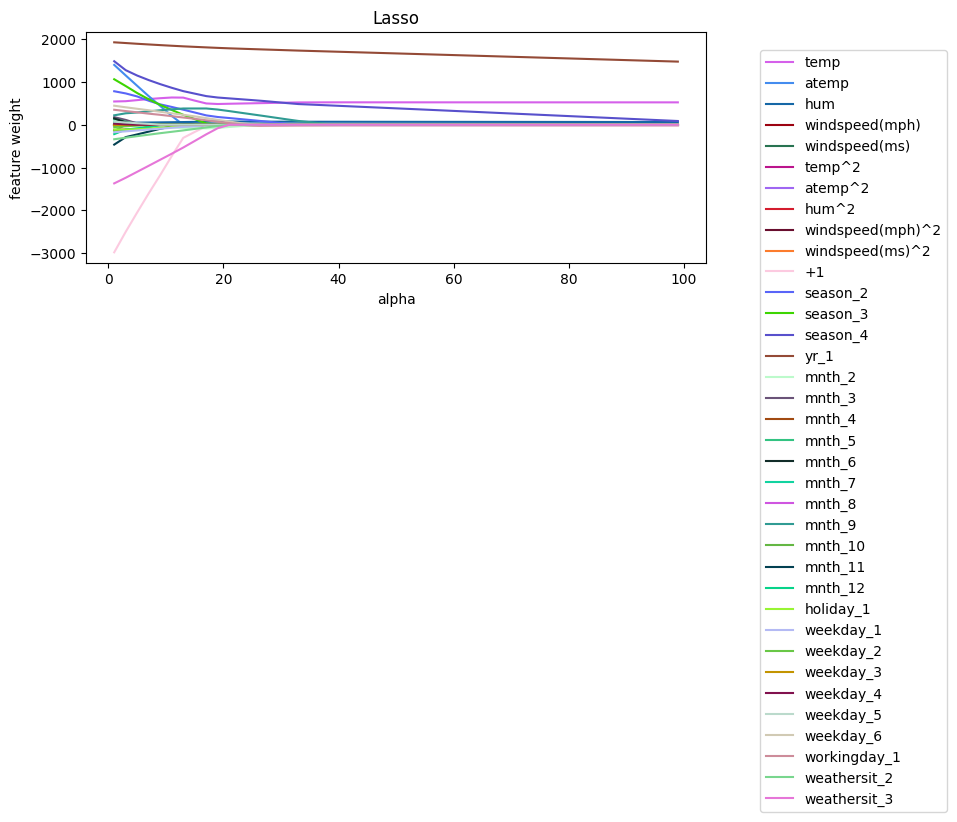

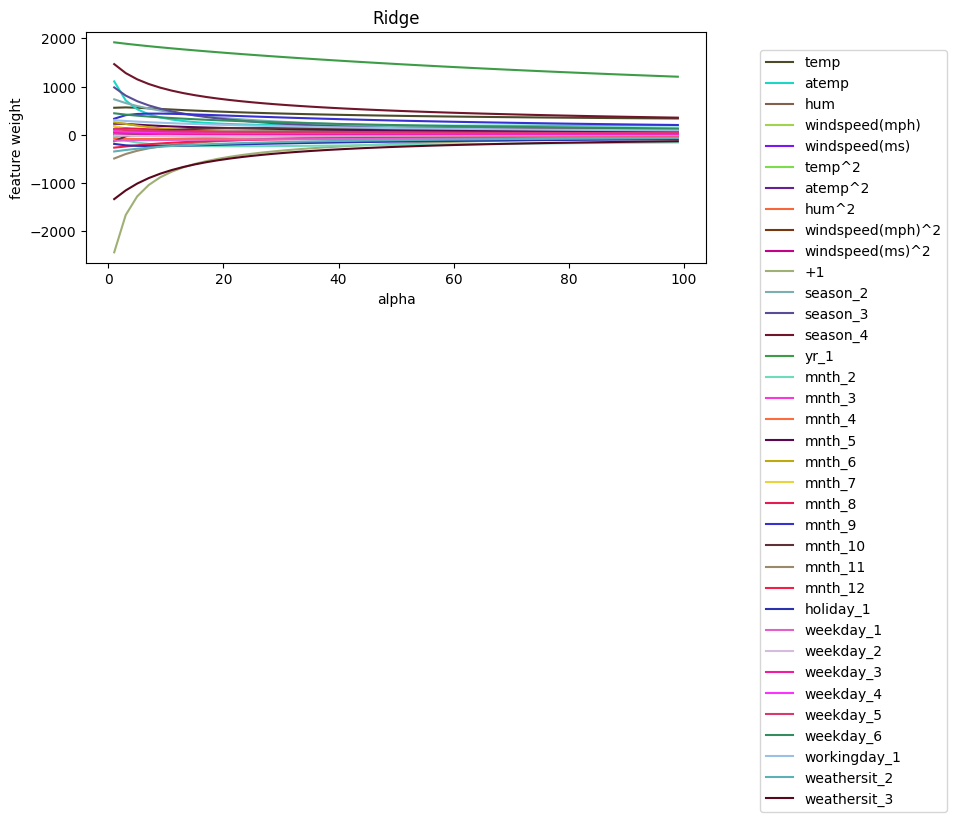

In [239]:
plt.figure(figsize=(8, 3))
for coef, feature in zip(coefs_lasso.T, features):
    plt.plot(alphas, coef, label=feature, color=np.random.rand(3))
plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
plt.xlabel("alpha")
plt.ylabel("feature weight")
plt.title("Lasso")

plt.figure(figsize=(8, 3))
for coef, feature in zip(coefs_ridge.T, features):
    plt.plot(alphas, coef, label=feature, color=np.random.rand(3))
plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
plt.xlabel("alpha")
plt.ylabel("feature weight")
plt.title("Ridge")

Картинки вышли красивыми. Обратите внимание, что регуляризатор Lasso агрессивнее уменьшает веса. Подумайте с чем это связано. Если делать `alpha` очень большим, веса зануляются. В случае Ridge такого не происходит. Веса становятся всё ближе к нулю, но зануления не происходит.  Из-за того, что Lasso зануляет некоторые признаки, его можно использовать для отбора самых важных признаков. Дальше будем работать именно с ним.

Итак, мы видим, что при изменении `alpha` модель по-разному подбирает коэффициенты признаков. Нам нужно выбрать наилучшее `alpha`. Для этого, во-первых, нам нужна метрика качества. Будем использовать в качестве метрики сам оптимизируемый функционал метода наименьших квадратов, то есть MSE (Mean Square Error).

Во-вторых, нужно понять, на каких данных эту метрику считать. Нельзя выбирать `alpha` по значению MSE на обучающей выборке, потому что тогда мы не сможем оценить, как модель будет делать предсказания на новых для нее данных. Если мы выберем одно разбиение выборки на обучающую и тестовую, то настроимся на конкретные "новые" данные, и вновь можем переобучиться.

Именно такую настройку вы наблюдали выше, когда запускали код с наивным прогнозом много раз подряд. Поэтому будем делать несколько разбиений выборки, на каждом пробовать разные значения `alpha`, а затем усреднять MSE. Удобнее всего делать такие разбиения кросс-валидацией, то есть разделить выборку на $K$ частей, или блоков, и каждый раз брать одну из них как тестовую, а из оставшихся блоков составлять обучающую выборку.

Подбирать параметр `alpha` в `sklearn` совсем просто: для этого есть `GridSearchCV`. Мы уже сталкивались с примером применения этой функции на семинаре. Попробуйте с помощью неё перебрать список из альф и подыскать оптимальное. Параметр cv отвечает за то, на сколько частей делится выборка. Поставьте `cv=5`. Также укажите параметр `scoring = neg_mean_squared_error`. Это задаст функцию потерь, на которую будет ориентироваться `GridSearchCV` при переборе. Назовите переменную, в которой будет находиться перебор __grid_cv_lasso.__

In [240]:
from sklearn.model_selection import GridSearchCV

In [241]:
searcher = GridSearchCV(
    Lasso(max_iter = 100000), [{"alpha": alphas}],
    scoring="neg_mean_squared_error", cv=5
)
searcher.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(max_iter=100000),
             param_grid=[{'alpha': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67,
       69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99])}],
             scoring='neg_mean_squared_error')

__в) [2 балла]__ Подберите для Lasso-регрессии с помощью поиска по решётке оптимальное значение $\alpha$.  Каким оказалось это значение?


In [242]:
best_alpha = searcher.best_params_["alpha"]
best_alpha

1

__г) [2 балла]__ Каким получается качество прогноза для модели с оптимальным значением $\alpha$?

In [243]:
alpha = 1
model_lasso_best = Lasso(alpha, max_iter = 10000)
model_lasso_best.fit(X_train, y_train)
pred_train = model_lasso_best.predict(X_train)
pred_test = model_lasso_best.predict(X_test)

In [244]:
print('Lasso model with best alpha = {} '.format(alpha))
print('RMSE на трейне: {}'.format(rmse(y_train, pred_train)))
print('r2 на трейне: {}'.format(r2_score(y_train, pred_train)))
print()
print('RMSE на тесте: {}'.format(rmse(y_test, pred_test)))
print('r2 на тесте: {}'.format(r2_score(y_test, pred_test)))

Lasso model with best alpha = 1 
RMSE на трейне: 689.7124995047681
r2 на трейне: 0.8741202925270002

RMSE на тесте: 751.0591289223499
r2 на тесте: 0.8462301444269509


__д) [2 балла]__ Наконец, как принято в анализе данных, давайте проинтерпретируем результат. Проинтерпретируйте последнюю обученую модель. У каких признаков наибольшие положительные коэфициенты? У каких наибольшие отрицательные? Логично ли утверждать, что чем больще/меньше эти признаки, тем выше/ниже спрос на велосипеды? Какие коэффициенты занулились?

In [247]:
df_weights = pd.DataFrame((model_lasso_best.coef_).T,X_train.columns).reset_index()
df_weights.columns = ['name','weight']
df_weights.head()

,name,weight
0,temp,11184.885354
1,atemp,0.000000
2,hum,176.972533
3,windspeed(mph),-1404.664580
4,windspeed(ms),-0.000001


windspeed(mph) и windspeed(ms) признак скорость ветра в разных единицах изменения, коррелированы одинаково, windspeed(ms) практически занулился

При альфа = 1, занулились веса у следующих признаков: atemp и temp идентично коррелированы, первый признак был убран за неинформативность - atemp это температура по "ощущениям"

In [229]:
df_weights[df_weights.weight ==0] # все, что занулилось

,name,weight
1,atemp,0.0
6,atemp^2,-0.0
10,+1,0.0
28,weekday_2,-0.0


In [230]:
df_weights.loc[df_weights.weight.idxmin()] # это минимальный вес при а = 1

name           temp^2
weight   -7496.061614
Name: 5, dtype: object

In [231]:
df_weights.loc[df_weights.weight.idxmax()] # это максимальный вес

name              temp
weight    11184.885354
Name: 0, dtype: object

temp^2 - отрицательный вес, при большем значении температуры эффект на таргет начинает уменьшаться. Наша модель будет компенсировать влияние линейного temp через нелинейный temp^2. При маленьких значениях temp будет делать бОльший вклад в таргет (положительный). При высокой температуре признак temp^2 может доминировать и давать отрицательный вклад в прогноз.


---




По весам можно смотреть какой признак важнее? Да, но только если данные у нас скалировались. Если признаки имеют разные масштабы, веса будут зависеть от единиц измерения, путем скалинга мы переводим все значения признаков к единой шкале и уже можем напрямую сравнивать веса: где больше - там важнее.


---



__е) [2 балла]__ В прошлой домашке, когда мы придумывали фичи, мы предположили, что спрос на велосипеды зависит от скорости ветра квадратично, по параболе. Подтвердилось ли это предположение?

__Ответ:__  ... Да, момент есть. На это ответ чуть выше в блоке про мин и макс веса.


---



# Любимая рубрика

<img src = 'https://sun9-70.userapi.com/impg/BfQzIbUF3S4D-s35Zfrsx6-2OTTEbvzBLnQVfw/AqriDtQ6ypw.jpg?size=562x1226&quality=95&sign=bf4cfcb64e33e5db19e94f742e0d2a3a&type=album' width = 400>



<img src = 'https://sun9-69.userapi.com/impg/OYWVCKPBZaqhlDKYWvcIf-ZPpd09vZYa2lWqPg/v8JPEacDfWs.jpg?size=934x1072&quality=95&sign=ecfe70bb262e697dd4d3ca7a39d8b508&type=album' width = 500>